In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [3]:
# Load data
root = '/home/tc/OneDrive/Software/MSFiltration/experiments/'

with open(root+'stability_sbm_04-28_21:14.pkl', 'rb') as handle:
    results_sbm = pickle.load(handle)

persistence_sbm = results_sbm['persistence']
bottleneck_sbm = results_sbm['bottleneck']
wasserstein_sbm = results_sbm['wasserstein']

with open(root+'stability_er_04-29_15:45.pkl', 'rb') as handle:
    results_er = pickle.load(handle)

persistence_er = results_er['persistence']
bottleneck_er = results_er['bottleneck']
wasserstein_er = results_er['wasserstein']

In [4]:
print('### 100 SBM realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_sbm[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_sbm[:,:,i].mean(),5))
    
print('\n### 100 ER realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_er[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_er[:,:,i].mean(),5))
    

### 100 SBM realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.38591
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  0.18843
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.00338
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise Wasserstein distance for 0-dimensional Dgm:  1.52728
Mean pair-wise Wasserstein distance for 1-dimensional Dgm:  0.75189
Mean pair-wise Wasserstein distance for 2-dimensional Dgm:  0.00348
Mean pair-wise Wasserstein distance for 3-dimensional Dgm:  0.0

### 100 ER realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.1415
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise Wasserstein distance for 0-dimensional Dgm:  1.37634
Mean pair-wise Wasserstein distance for 1-dimensional Dgm:  35.94135
Mean pair-wise Was

In [5]:
tmin = -1.5
tmax = 0.5
delta = 0.1*abs(tmax-tmin)
infinity = tmax+delta

In [6]:
import matplotlib.patches as mpatches

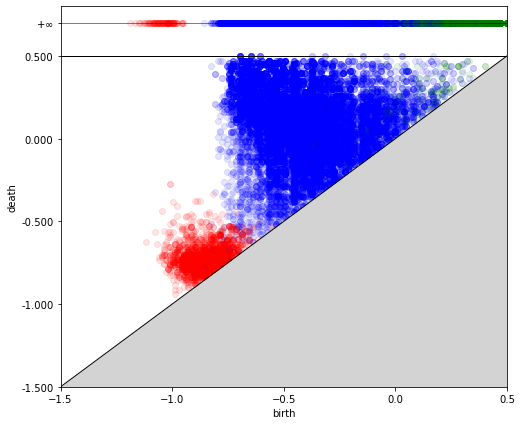

In [13]:
fig, ax = plt.subplots(1, figsize=(8, 7))

# define colormap
colormap = ['red','blue','green','purple']

# infinity line
ax.plot([tmin, tmax], [infinity, infinity], linewidth=1.0, color="k", alpha = 0.5)

# plot persistences
for i in range(100):
    for dim in range(3):
        ax.scatter(persistence_er[i][dim][:,0],np.nan_to_num(persistence_er[i][dim][:,1],posinf=infinity), color = colormap[dim], alpha=0.1)

# plot top line
ax.plot([tmin, tmax], [tmax, tmax], linewidth=1.0, color="k")

# plot diag
ax.plot([tmin, tmax], [tmin, tmax], linewidth=1.0, color="k")

# plot lower diag patch
ax.add_patch(mpatches.Polygon([[tmin, tmin], [tmax, tmin], [tmax, tmax]], fill=True, color='lightgrey'))

# labels and axes limits
ax.set(xlabel='Birth', ylabel = 'Death',xlim=(tmin,tmax),ylim=(tmin,infinity+0.5*delta))

# Infinity and axes label
yt = ax.get_yticks()
yt = yt[np.where(yt <= tmax)] # to avoid ploting ticklabel higher than infinity
yt = np.append(yt, infinity)
ytl = ["%.3f" % e for e in yt]  # to avoid float precision error
ytl[-1] = r'$+\infty$'
ax.set_yticks(yt)
ax.set_xticks(yt[:-1])
ax.set_yticklabels(ytl)

plt.show()
#plt.savefig(root_fig +'stability_er.pdf', dpi=fig.dpi,bbox_inches='tight')

In [58]:
fig, ax = plt.subplots(1, figsize=(8, 7))

# define colormap
colormap = ['red','blue','green','purple']

# infinity line
ax.plot([tmin, tmax], [infinity, infinity], linewidth=1.0, color="k", alpha = 0.5)

for i in range(100):
    for dim in range(3):
        persistences = persistence_er[i][dim]
        for cycle in range(len(persistences)):
            ax.scatter(persistences[cycle,0],min(persistences[cycle,1],infinity), color = colormap[dim], alpha=0.1)

# top line
ax.plot([tmin, tmax], [tmax, tmax], linewidth=1.0, color="k")

# diag
ax.plot([tmin, tmax], [tmin, tmax], linewidth=1.0, color="k")

# lower diag patch
ax.add_patch(mpatches.Polygon([[tmin, tmin], [tmax, tmin], [tmax, tmax]], fill=True, color='lightgrey'))

# labels and axes limits
ax.set(xlabel='birth', ylabel = 'death', title='100 ER realisations',xlim=(tmin,tmax),ylim=(tmin,infinity+0.5*delta))

# Infinity and axes label
yt = ax.get_yticks()
yt = yt[np.where(yt <= tmax)] # to avoid ploting ticklabel higher than infinity
yt = np.append(yt, infinity)
ytl = ["%.3f" % e for e in yt]  # to avoid float precision error
ytl[-1] = r'$+\infty$'
ax.set_yticks(yt)
ax.set_xticks(yt[:-1])
ax.set_yticklabels(ytl)

plt.show()
#plt.savefig(root_fig +'stability_er.pdf', dpi=fig.dpi,bbox_inches='tight')

inf

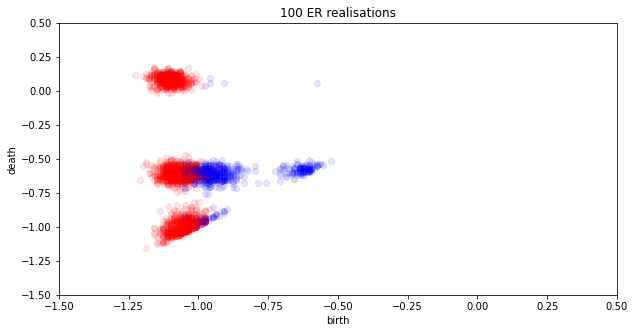

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for i in range(100):

    plt.scatter(persistence_sbm[i][0][:,0],persistence_sbm[i][0][:,1], color = 'red', alpha=0.1)
    plt.scatter(persistence_sbm[i][1][:,0],persistence_sbm[i][1][:,1], color = 'blue', alpha=0.1)
    plt.scatter(persistence_sbm[i][2][:,0],persistence_sbm[i][2][:,1], color = 'green', alpha=0.1)

ax.set(xlabel='birth', ylabel = 'death', title='100 ER realisations',xlim=(-1.5,0.5),ylim=(-1.5,0.5))
plt.show()
#plt.savefig(root_fig +'stability_sbm.pdf', dpi=fig.dpi,bbox_inches='tight')